## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_df = pd.merge(mouse_metadata,study_results, how='inner', on='Mouse ID')

# Display the data table for preview
combine_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_ct = len(combine_df["Mouse ID"].unique())
mice_df = pd.DataFrame({"# Mice": [mice_ct]})
mice_df


,# Mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_df = study_results[study_results.duplicated(subset=['Mouse ID','Timepoint'])]
dup_id_df = pd.DataFrame({'Mouse ID':duplicated_df['Mouse ID'].unique()})
dup_id_df


,Mouse ID
0,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data_df = combine_df[combine_df['Mouse ID'].isin(dup_id_df['Mouse ID'])]
dup_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combine_df = combine_df[~combine_df['Mouse ID'].isin(dup_id_df['Mouse ID'])]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_ct = len(clean_combine_df["Mouse ID"].unique())
clean_mice_df = pd.DataFrame({"# Mice": [clean_mice_ct]})
clean_mice_df

,# Mice
0,248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
groupped_df = clean_combine_df.groupby(['Drug Regimen'])

tumor_mean = groupped_df['Tumor Volume (mm3)'].mean()
tumor_median = groupped_df['Tumor Volume (mm3)'].median()
tumor_variance = groupped_df['Tumor Volume (mm3)'].var()
tumor_std = groupped_df['Tumor Volume (mm3)'].std()
tumor_sem = groupped_df['Tumor Volume (mm3)'].sem()

#All toghether in the summary Data Frame
summary_data = pd.DataFrame({"Mean": tumor_mean,
                            "Median": tumor_median,
                             "Variance": tumor_variance,
                             "STD": tumor_std,
                             "SEM": tumor_sem
                            })

summary_data["Mean"] = summary_data["Mean"].astype(float).map("{:,.2f}".format)
summary_data["Median"] = summary_data["Median"].astype(float).map("{:,.2f}".format)
summary_data["Variance"] = summary_data["Variance"].astype(float).map("{:,.2f}".format)
summary_data["STD"] = summary_data["STD"].astype(float).map("{:,.2f}".format)
summary_data["SEM"] = summary_data["SEM"].astype(float).map("{:,.2f}".format)
summary_data

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_data2 = groupped_df['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem])
#summary_data2 = summary_data2.astype(float).map("{:,.2f}".format)
summary_data2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

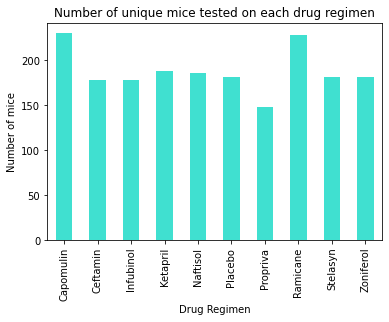

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_gr_ct = clean_combine_df.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
mice_gr_ct.plot.bar(title = "Number of unique mice tested on each drug regimen", facecolor="turquoise")
plt.ylabel("Number of mice")
plt.xlabel("Drug Regimen")

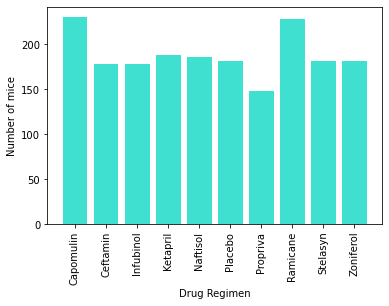

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

mice_gr_ct = clean_combine_df.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
plt.bar(mice_gr_ct.index,mice_gr_ct.values,facecolor="turquoise")
plt.xticks(rotation=90)
plt.ylabel("Number of mice")
plt.xlabel("Drug Regimen")
plt.show()


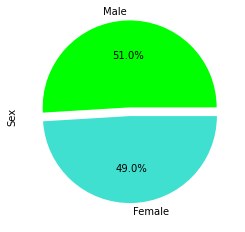

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_combine_df["Sex"].value_counts()
explode = (.1,0)
gender.plot.pie(explode=explode, autopct = "%1.1f%%", colors = ['lime', 'turquoise'])


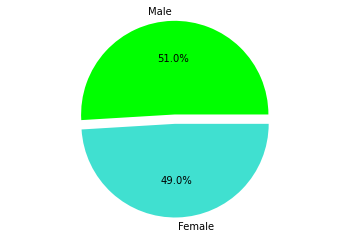

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
explode = (.1,0)
plt.title = "Gender"
plt.pie(gender, labels = labels, explode=explode, autopct = "%1.1f%%", colors = ['lime', 'turquoise'])
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
gr_timepoint = clean_combine_df.groupby('Mouse ID').max()['Timepoint']
#gr_timepoint.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

gr_time_comb_df = pd.merge(gr_timepoint,clean_combine_df, how ='inner', on= ('Mouse ID','Timepoint') )
gr_time_comb_df
#combine_df = pd.merge(mouse_metadata,study_results, how='inner', on='Mouse ID')

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_reg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol =[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in Drug_reg:   
    drug_df = gr_time_comb_df[gr_time_comb_df['Drug Regimen'] == drug]  
    quartiles = drug_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = drug_df.loc[(drug_df['Tumor Volume (mm3)'] < lower_bound) | (drug_df['Tumor Volume (mm3)'] > upper_bound)].count()["Tumor Volume (mm3)"]
    print(drug)
    print(f"IQR = {iqr}")
    print(f"outlier = {outlier}")
    print("-----------------------------")
    Tumor_vol_df = pd.DataFrame({'Drug Regimen': drug,
                                 'Tumor Volume (mm3)':drug_df['Tumor Volume (mm3)'] })  
    Tumor_vol.append(Tumor_vol_df)
    

Capomulin
IQR = 7.781863460000004
outlier = 0
-----------------------------
Ramicane
IQR = 9.098536719999998
outlier = 0
-----------------------------
Infubinol
IQR = 11.477135160000003
outlier = 1
-----------------------------
Ceftamin
IQR = 15.577752179999997
outlier = 0
-----------------------------


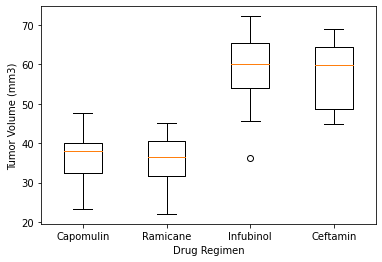

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plot_data = [Tumor_vol[0]['Tumor Volume (mm3)'],Tumor_vol[1]['Tumor Volume (mm3)'],\
             Tumor_vol[2]['Tumor Volume (mm3)'],Tumor_vol[3]['Tumor Volume (mm3)']]

plt.boxplot(plot_data, vert = True)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.xticks([1,2,3,4],Drug_reg)
plt.show()


## Line and Scatter Plots

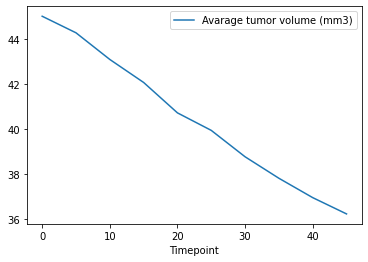

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capo_df = clean_combine_df[clean_combine_df['Drug Regimen'] == "Capomulin"]
Group_Capo_df = Capo_df.groupby('Timepoint')
Avg_tum_vol = Group_Capo_df["Tumor Volume (mm3)"].mean()
Capo_Avg_tum_vol_df = pd.DataFrame({"Avarage tumor volume (mm3)": Avg_tum_vol})

Capo_Avg_tum_vol_df.plot()
plt.show()


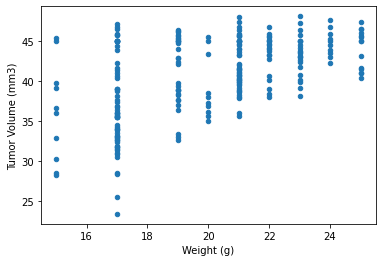

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capo_df.plot(kind="scatter",x="Weight (g)",y="Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

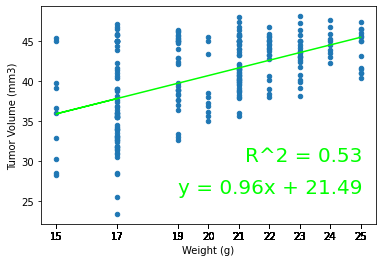

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation_coef = round(st.pearsonr(Capo_df['Weight (g)'],Capo_df['Tumor Volume (mm3)'])[0],2)
corr_coef = "R^2 = " + str(round(correlation_coef,2))

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(Capo_df['Weight (g)'],Capo_df['Tumor Volume (mm3)'])
tw_fit = tw_slope * Capo_df['Weight (g)'] + tw_int
reg_eq = "y = " + str(round(tw_slope,2)) + "x + " +str(round(tw_int,2))
Capo_df.plot(kind="scatter",x="Weight (g)",y="Tumor Volume (mm3)")
plt.plot(Capo_df['Weight (g)'],tw_fit,"lime")
plt.annotate(reg_eq,(19,26), fontsize = 20, color="lime")
plt.annotate(corr_coef,(21.2,30), fontsize = 20, color="lime")
plt.xticks(Capo_df['Weight (g)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()